## Alumno : Rubén Álvarez Mosquera

---
# **Clasificación Binaria de la superviviencia en el Titanic**

*Prefacio : Nuestra tarea consiste en clasificar la supervivencia o no de un pasajero en el Titanic*

En la madrugada del 15 de abril de 1912, el transatlántico británico RMS Titanic, naufragó en las aguas del océano Atlantico, tras chocar con un iceberg.

En el undimiento perecieron 1496 personas de las 2208 que iban a bordo.

---

## Declaración de módulos
---

En primer lugar, vamos a importar algunos módulos comunes. 

También comprobamos que Python 3.5 o posterior está instalado (aunque Python 2.x puede funcionar, está obsoleto por lo que es **altamente** recomendable utilizar Python 3 en su lugar), así como Scikit-Learn ≥0.20.

También agregaremos una librería (warnings) para evitar los molestos mensajes de advertencia(Futurewarnings).

In [1]:
# Se requiere Python ≥ 3.5
import sys
assert sys.version_info >= (3, 5)

# Se requiere Scikit-Learn ≥ 0.20
import sklearn
assert sklearn.__version__ >= "0.20"

# Otros imports
import numpy as np
import os

# Importamos la librería Pandas para administar Dataframes
import pandas as pd

# la línea que sigue, sólo en Colab ...
# %matplotlib inline
# Importamos librería MatPlotLib
import matplotlib as mpl
import matplotlib.pyplot as plt


# Importamos librería "Seaborn" para la visualización que es como un MatPlotLib con "esteriodes"
import seaborn as sns 


# Importa la librería que va a posibilitar evitar que salgan los molestos mensajes de advertencia
import warnings

Configuración de las Advertencias "Futurewarning"

In [2]:
# configuración para eviatar que aparezcan las advertencias "FutureWarnings"
warnings.filterwarnings("ignore", category=FutureWarning)

Configuración de las visualizaciones de "Seaborn"

In [3]:
# tamaño del texto en las etiquetas por defecto para Matplotlib
mpl.rc('axes',  labelsize=15)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)


# Configuramos visualizaciones con Seaborn
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

## Importacion de Datos
---

Definimos la función que importará los datos de un archivo CSV a un Dataframe de Pandas

In [4]:
INSURANCE_PATH = os.path.join("dataset");

def load_insurance_data(insurance_path):
    csv_path = os.path.join(insurance_path, "tested.csv")
    return pd.read_csv(csv_path)

Llamamos a la función de importación de datos y los importamos a la variable "insurance"

In [5]:
titanic = load_insurance_data(INSURANCE_PATH)

Comprobamos el estado de los Datos, mediante una revisión de las primeras filas

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
titanic_backup = titanic.copy()

## Revisamos el estado de los datos
---

Revisamos las columnas en general

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Comprobación del número de NaN por categoría

In [9]:
# De forma global
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### "PassengerId" ------------------------------------------
*Número de identificación del pasajero*

In [10]:
titanic['PassengerId'].describe()

count     418.000000
mean     1100.500000
std       120.810458
min       892.000000
25%       996.250000
50%      1100.500000
75%      1204.750000
max      1309.000000
Name: PassengerId, dtype: float64

In [11]:
titanic['PassengerId'].value_counts()

892     1
1205    1
1177    1
1176    1
1175    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: PassengerId, Length: 418, dtype: int64

- Es una variable categórica
- No con tiene NaN
- Debemos prescindir de ella para los cálculos de la predicción porque no aporta datos revelantes

In [12]:
# Eliminación de la columna "PassegerID"
titanic.drop(["PassengerId"],axis=1, inplace=True)

### "Survived" ------------------------------------------
*Si el pasajero sobrevivió al naufragio*

In [13]:
titanic['Survived'].describe()

count    418.000000
mean       0.363636
std        0.481622
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [14]:
titanic['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64


- Es una variable binaria 0/1
- No contiene NaN
- Es la variable que buscaremos predecir con este dataset.
- No tenemos que realizar ninguan actuación sobre ella.

### "Pclass" ------------------------------------------
*Clase a la que pertenecía el pasajero*


In [15]:
titanic['Pclass'].describe()

count    418.000000
mean       2.265550
std        0.841838
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [16]:
titanic['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

- Es una variable categórica con 3 valores
- No contiene NaN
- Deberemos normalizar las columnas categorias en tres columnas por cada una de las 3 clases
- Eso lo haremos más adelante con la herramienta OneHotEncoder

### "Name" ------------------------------------------
*Nombre y Apellidos*


In [17]:
titanic['Name'].describe()

count                  418
unique                 418
top       Kelly, Mr. James
freq                     1
Name: Name, dtype: object

- Es una variable categórica con valores únicos 
- No contiene NaN
- Deberemos eliminar la columna del dataset ya que no aporta datos al modelo de predicción

In [18]:
# Eliminación de la columna "Name"
titanic.drop(["Name"],axis=1, inplace=True)

### "Sex" ------------------------------------------
*Sexo*


In [19]:
titanic['Sex'].describe()

count      418
unique       2
top       male
freq       266
Name: Sex, dtype: object

In [20]:
titanic['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

- Es una variable categórica con 2 valores únicos Male/Female
- No contiene NaN
- Deberemos normalizar las columnas categorias en dos columnas por cada una de las clases
- Eso lo haremos más adelante con la herramienta OneHotEncoder

### "Age" ------------------------------------------
*Edad*


In [21]:
titanic['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [22]:
titanic['Age'].isna().sum()

86

- Es una variable contínua
- Contiene 86 NaN
- Deberemos rellenar los NaN con la media de las edades

In [23]:
# Hallamos la media redondeada a años
media_age = round(titanic["Age"].mean(),0)
print("La media redondeada a años es: ", round(titanic["Age"].mean(),0))
# Localizamos el índice del NaN
lista_NaN_age = list(titanic.loc[pd.isna(titanic["Age"]), :].index)
print("Lista de los índices con NaN : ", list(titanic.loc[pd.isna(titanic["Age"]), :].index))
# Cambiamos el valor de los índice para la columna añoas por la media
for x in lista_NaN_age:
    titanic.loc[x,'Age']=media_age

#Revisamos resultados 
print("Después de los cambios, el número de los NaN en la columna 'age' es de : ", titanic["Age"].isna().sum())

La media redondeada a años es:  30.0
Lista de los índices con NaN :  [10, 22, 29, 33, 36, 39, 41, 47, 54, 58, 65, 76, 83, 84, 85, 88, 91, 93, 102, 107, 108, 111, 116, 121, 124, 127, 132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191, 199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255, 256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290, 292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366, 380, 382, 384, 408, 410, 413, 416, 417]
Después de los cambios, el número de los NaN en la columna 'age' es de :  0


### "SibSp" ------------------------------------------
*Número de herman@s en el barco*


In [24]:
titanic['SibSp'].describe()

count    418.000000
mean       0.447368
std        0.896760
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [25]:
titanic['SibSp'].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [26]:
titanic['SibSp'].isna().sum()

0

- Es una variable discreta con 6 valores, representando el número de hermanos
- No contiene NaN
- No deberemos realizar ninguna operación con ella

### "Parch" ------------------------------------------
*Número de padres e hijos en el barco*


In [27]:
titanic['Parch'].describe()

count    418.000000
mean       0.392344
std        0.981429
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        9.000000
Name: Parch, dtype: float64

In [28]:
titanic['Parch'].value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

In [29]:
titanic['Parch'].isna().sum()

0

- Es una variable discreta con 8 valores, representando el número de padres e hijos
- No contiene NaN
- No deberemos realizar ninguna operación con ella

### "Ticket" ------------------------------------------
*Número de tícket del pasajero*


- Es una variable categórica con valores únicos 
- No contiene NaN
- Deberemos eliminar la columna del dataset ya que no aporta datos al modelo de predicción

In [30]:
# Eliminación de la columna "Name"
titanic.drop(["Ticket"],axis=1, inplace=True)

### "Fare" ------------------------------------------
*Precio pagado por el billete*


In [31]:
titanic['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [32]:
titanic['Fare'].isna().sum()

1

- Es una variable continua
- Contiene 1 NaN
- Deberemos rellenar el NaN con el valor de media

In [33]:
# Hallamos la media redondeada de la tarifa
media_fare = round(titanic["Fare"].mean(),6)
print("La media de la tarifa es: ", round(titanic["Fare"].mean(),6))
# Localizamos el índice del NaN
lista_NaN_age = list(titanic.loc[pd.isna(titanic["Fare"]), :].index)
print("El índice con NaN es : ", list(titanic.loc[pd.isna(titanic["Fare"]), :].index))
# Cambiamos el valor NaN, para la columna "Fare" por la media
for x in lista_NaN_age:
    titanic.loc[x,'Fare']=media_fare

#Revisamos resultados 
print("Después de los cambios, el número de los NaN en la columna 'Fare'/tarifa es de : ", titanic["Fare"].isna().sum())

La media de la tarifa es:  35.627188
El índice con NaN es :  [152]
Después de los cambios, el número de los NaN en la columna 'Fare'/tarifa es de :  0


Podemos ver valores mínimos con "0.000000"

In [34]:
titanic["Fare"].value_counts()[0.000000]

2

In [35]:
# Hallamos la media redondeada de la tarifa
media_fare = round(titanic["Fare"].mean(),6)
print("La media de la tarifa es: ", round(titanic["Fare"].mean(),6))
# Localizamos el índice del valor"0.000.000"
lista_zero = titanic.index[titanic["Fare"] == 0.000000].tolist()
print("los índices de los valores '0.000000' de la comlumna 'Fare' son : ", lista_zero)
# Cambiamos el valor "0.000000", para la columna "Fare" por la media
for x in lista_zero:
    titanic.loc[x,'Fare']=media_fare

La media de la tarifa es:  35.627188
los índices de los valores '0.000000' de la comlumna 'Fare' son :  [266, 372]


### "Cabin" ------------------------------------------
*Identificador de camarote del pasajero*


In [36]:
# número total de valores en la columna "Cabin"
len(titanic["Cabin"])

418

In [37]:
# Distribución de los números
titanic["Cabin"].describe()

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object

In [38]:
# Cantidad de NaN en la columna "Cabin"
titanic["Cabin"].isna().sum()

327

In [39]:
# Detalle de los valores únicos de la columna "Cabin"
titanic["Cabin"].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

- Es una variable categórica
- Contiene 327 NaN
- Deberemos normalizar las columnas categorias en dos columnas por cada una de las clases
- Eso lo haremos más adelante con la herramienta OneHotEncoder

Podemos observar que :
- el Total de valores = 418
- el total de NaN     = 327
- el total no-NaN     =  91

En este caso lo vamos a dividir entre cubiertas y Desconocido
- En el caso de las cubiertas designaremos las Letras : "A","B","C", etc...
- En el caso del Desconocido pondremos la letra "U" de Unknown

In [40]:
# Localizamos el índice del NaN
lista_NaN_age = list(titanic.loc[pd.isna(titanic["Cabin"]), :].index)
# Cambiamos el valor NaN, y ás si los hubiera para la columna "Cabin" por la letra "U"
for x in lista_NaN_age:
    titanic.loc[x,'Cabin']="U"
# Cambiamos el valor de la columna "Cabin" por el primer caracter 
for x in range(len(titanic["Cabin"])):
    titanic.loc[x,"Cabin"]= titanic.loc[x,"Cabin"][0]

#Revisamos resultados 
print("Después de los cambios, el número de los NaN en la columna 'Cabin'es de : ", titanic["Fare"].isna().sum())

Después de los cambios, el número de los NaN en la columna 'Cabin'es de :  0


In [41]:
# Revisamos como ha quedado distribuida la columna "Cabin"
titanic["Cabin"].value_counts()

U    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

### "Embarked" ------------------------------------------
*Puerto desde el que embarcó el pasajero*


In [42]:
titanic['Embarked'].describe()

count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object

In [43]:
titanic['Embarked'].isna().sum()

0

- Es una variable categórica
- No contiene NaN
- Deberemos normalizar las columnas categorias en dos columnas por cada una de las clases
- Eso lo haremos más adelante con la herramienta OneHotEncoder

---

## Revisión y tratamiento de las columnas categorizadas : Sex, Cabin, Embarked, Pclass
---


Revisaremos las tres categorías, agregando la columna a una variable que usaremos posteriormente, y revisaremos el tipo de las categorías y sus valores

### Sex

In [44]:
# agregamos la columna a una variable
cat_sexo = titanic[ ["Sex"] ]

# Revisamos el contenido de la columna
titanic["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

### Cabin

In [45]:
# agregamos la columna a una variable
cat_cabin = titanic[ ["Cabin"] ]

# Revisamos el contenido de la columna
titanic["Cabin"].value_counts()

U    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

### Embarked

In [46]:
# agregamos la columna a una variable
cat_embar = titanic[ ["Embarked"] ]

# Revisamos el contenido de la columna
titanic["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

### Embarked

In [47]:
# agregamos la columna a una variable
cat_pclass = titanic[ ["Pclass"] ]

# Revisamos el contenido de la columna
titanic["Pclass"].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

Podemos observar que son columnas categarizadas, que para el entrenamiento no pueden existir, por lo que necesitamos pasar de columnas categorizadas a otro tipo de expresión como por ejemplo a la división de las categorías en nuevas columnas y poniendo un 0 cuando no se cumpla la condición de la categoría y un "1" cuando sí.

De esta forma no estaremos añadiendo información al Dataset, y nos permitirá el estudio y el entrenamiento del modelo.

## Uso de OneHotEncoder para la gestión de las cloumnas categorizadas
---

OneHotencoder nos permitirá pasar las categorías a diferentes columnas por valor de categoría y agregarle "0" y "1" en cada caso.

Ante de nada realizaremos un Backup de los datos por si necesitáramos volver al estado anterior

In [48]:
# Haremos una copia para ver los resultados 
titanic_backup = titanic.copy()

Crearemos una nueva variable con el Dataframe Normalizado llamdo "titanic_norm"

In [49]:
titanic_norm = titanic.copy()

Llamamos a la librería "OneHotEncoder" de Sklearn

In [50]:
# Declaramos la librería OneHotEncoder de sklearn
from sklearn.preprocessing import OneHotEncoder

Usamos el método con cada una de las columnas categóricas, empezando por


### SEXO

In [51]:
sexo_encoder =OneHotEncoder(sparse=False)
# para la categoria Sexo (male/female)
sexo_cat_1hot = sexo_encoder.fit_transform(cat_sexo)

sexo_cat_1hot

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [52]:
# Aquí tendremos los nombre de las categorías
sexo_encoder.categories_

[array(['female', 'male'], dtype=object)]

In [53]:
# Ahora sustituiremos la columna Sexo , por las de OneHotEncoder
titanic_norm.reset_index(drop=False, inplace=True)
titanic_norm=titanic_norm.join(pd.DataFrame(sexo_cat_1hot, columns=[cat for cat in sexo_encoder.categories_[0]]))
# Borraremos la columna categorizada, así como el index que se añadió al realizar el join 
titanic_norm=titanic_norm.drop(["Sex","index"], axis=1)
# Mostramos el resultado
titanic_norm.info()
titanic_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Cabin     418 non-null    object 
 7   Embarked  418 non-null    object 
 8   female    418 non-null    float64
 9   male      418 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 32.8+ KB


,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,female,male
0,0,3,34.5,0,0,7.8292,U,Q,0.0,1.0
1,1,3,47.0,1,0,7.0000,U,S,1.0,0.0
2,0,2,62.0,0,0,9.6875,U,Q,0.0,1.0
3,0,3,27.0,0,0,8.6625,U,S,0.0,1.0
4,1,3,22.0,1,1,12.2875,U,S,1.0,0.0


### CABIN

In [54]:
cabin_encoder =OneHotEncoder(sparse=False)
# para la categoria Sexo (male/female)
cabin_cat_1hot = cabin_encoder.fit_transform(cat_cabin)

# Ahora sustituiremos la columna Sexo , por las de OneHotEncoder
titanic_norm.reset_index(drop=False, inplace=True)
titanic_norm=titanic_norm.join(pd.DataFrame(cabin_cat_1hot, columns=[cat for cat in cabin_encoder.categories_[0]]))
# Borraremos la columna categorizada, así como el index que se añadió al realizar el join 
titanic_norm=titanic_norm.drop(["Cabin","index"], axis=1)
# Mostramos el resultado
titanic_norm.info()
titanic_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
 7   female    418 non-null    float64
 8   male      418 non-null    float64
 9   A         418 non-null    float64
 10  B         418 non-null    float64
 11  C         418 non-null    float64
 12  D         418 non-null    float64
 13  E         418 non-null    float64
 14  F         418 non-null    float64
 15  G         418 non-null    float64
 16  U         418 non-null    float64
dtypes: float64(12), int64(4), object(1)
memory usage: 55.6+ KB


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male,A,B,C,D,E,F,G,U
0,0,3,34.5,0,0,7.8292,Q,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,3,47.0,1,0,7.0000,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,2,62.0,0,0,9.6875,Q,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,3,27.0,0,0,8.6625,S,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,3,22.0,1,1,12.2875,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [55]:
# Cambiamos el nombre d elas columnas para entenderlo mejor
titanic_norm=titanic_norm.rename(columns={"A":"Cabin A"});
titanic_norm=titanic_norm.rename(columns={"B":"Cabin B"});
titanic_norm=titanic_norm.rename(columns={"C":"Cabin C"});
titanic_norm=titanic_norm.rename(columns={"D":"Cabin D"});
titanic_norm=titanic_norm.rename(columns={"E":"Cabin E"});
titanic_norm=titanic_norm.rename(columns={"F":"Cabin F"});
titanic_norm=titanic_norm.rename(columns={"G":"Cabin G"});
titanic_norm=titanic_norm.rename(columns={"U":"Cabin U"});

# Revisamos cambios 
titanic_norm.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin U
0,0,3,34.5,0,0,7.8292,Q,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,3,47.0,1,0,7.0000,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,2,62.0,0,0,9.6875,Q,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,3,27.0,0,0,8.6625,S,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,3,22.0,1,1,12.2875,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### EMBARKED

In [56]:
embar_encoder =OneHotEncoder(sparse=False)
# para la categoria Sexo (male/female)
embar_cat_1hot = embar_encoder.fit_transform(cat_embar)

# Ahora sustituiremos la columna Sexo , por las de OneHotEncoder
titanic_norm.reset_index(drop=False, inplace=True)
titanic_norm=titanic_norm.join(pd.DataFrame(embar_cat_1hot, columns=[cat for cat in embar_encoder.categories_[0]]))
# Borraremos la columna categorizada, así como el index que se añadió al realizar el join 
titanic_norm=titanic_norm.drop(["Embarked","index"], axis=1)
# Mostramos el resultado
titanic_norm.info()
titanic_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   female    418 non-null    float64
 7   male      418 non-null    float64
 8   Cabin A   418 non-null    float64
 9   Cabin B   418 non-null    float64
 10  Cabin C   418 non-null    float64
 11  Cabin D   418 non-null    float64
 12  Cabin E   418 non-null    float64
 13  Cabin F   418 non-null    float64
 14  Cabin G   418 non-null    float64
 15  Cabin U   418 non-null    float64
 16  C         418 non-null    float64
 17  Q         418 non-null    float64
 18  S         418 non-null    float64
dtypes: float64(15), int64(4)
memory usage: 62.2 KB


,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin U,C,Q,S
0,0,3,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,3,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0,3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,3,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [57]:
# Cambiamos el nombre d elas columnas para entenderlo mejor
titanic_norm=titanic_norm.rename(columns={"C":"Cherburgo"});
titanic_norm=titanic_norm.rename(columns={"Q":"Queenstown"});
titanic_norm=titanic_norm.rename(columns={"S":"Southampton"});

# Revisamos cambios 
titanic_norm.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin U,Cherburgo,Queenstown,Southampton
0,0,3,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,3,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0,3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,3,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Pclass

In [58]:
pclass_encoder =OneHotEncoder(sparse=False)
# para la categoria Sexo (male/female)
pclass_cat_1hot = pclass_encoder.fit_transform(cat_pclass)

# Ahora sustituiremos la columna Sexo , por las de OneHotEncoder
titanic_norm.reset_index(drop=False, inplace=True)
titanic_norm=titanic_norm.join(pd.DataFrame(pclass_cat_1hot, columns=[cat for cat in pclass_encoder.categories_[0]]))
# Borraremos la columna categorizada, así como el index que se añadió al realizar el join 
titanic_norm=titanic_norm.drop(["Pclass","index"], axis=1)
# Mostramos el resultado
titanic_norm.info()
titanic_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         418 non-null    float64
 5   female       418 non-null    float64
 6   male         418 non-null    float64
 7   Cabin A      418 non-null    float64
 8   Cabin B      418 non-null    float64
 9   Cabin C      418 non-null    float64
 10  Cabin D      418 non-null    float64
 11  Cabin E      418 non-null    float64
 12  Cabin F      418 non-null    float64
 13  Cabin G      418 non-null    float64
 14  Cabin U      418 non-null    float64
 15  Cherburgo    418 non-null    float64
 16  Queenstown   418 non-null    float64
 17  Southampton  418 non-null    float64
 18  1            418 non-null    float64
 19  2       

,Survived,Age,SibSp,Parch,Fare,female,male,Cabin A,Cabin B,Cabin C,...,Cabin E,Cabin F,Cabin G,Cabin U,Cherburgo,Queenstown,Southampton,1,2,3
0,0,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [59]:
# Cambiamos el nombre d elas columnas para entenderlo mejor
titanic_norm=titanic_norm.rename(columns={1:"FirstClass"});
titanic_norm=titanic_norm.rename(columns={2:"SecondClass"});
titanic_norm=titanic_norm.rename(columns={3:"ThirdClass"});

# Revisamos cambios 
titanic_norm.head()

,Survived,Age,SibSp,Parch,Fare,female,male,Cabin A,Cabin B,Cabin C,...,Cabin E,Cabin F,Cabin G,Cabin U,Cherburgo,Queenstown,Southampton,FirstClass,SecondClass,ThirdClass
0,0,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


---
---
---

## Estudio numérico de la correlación entre los datos para obtener información relevante
---

### Revisión de los histogramas de las columnas
---

Realizamos una visualización de los histogramas de los datos, que representan el número de veces que un valor aparece, representando la distribución de los casos por categoría para tener una idea de su cantidad, dispersión ,etc...

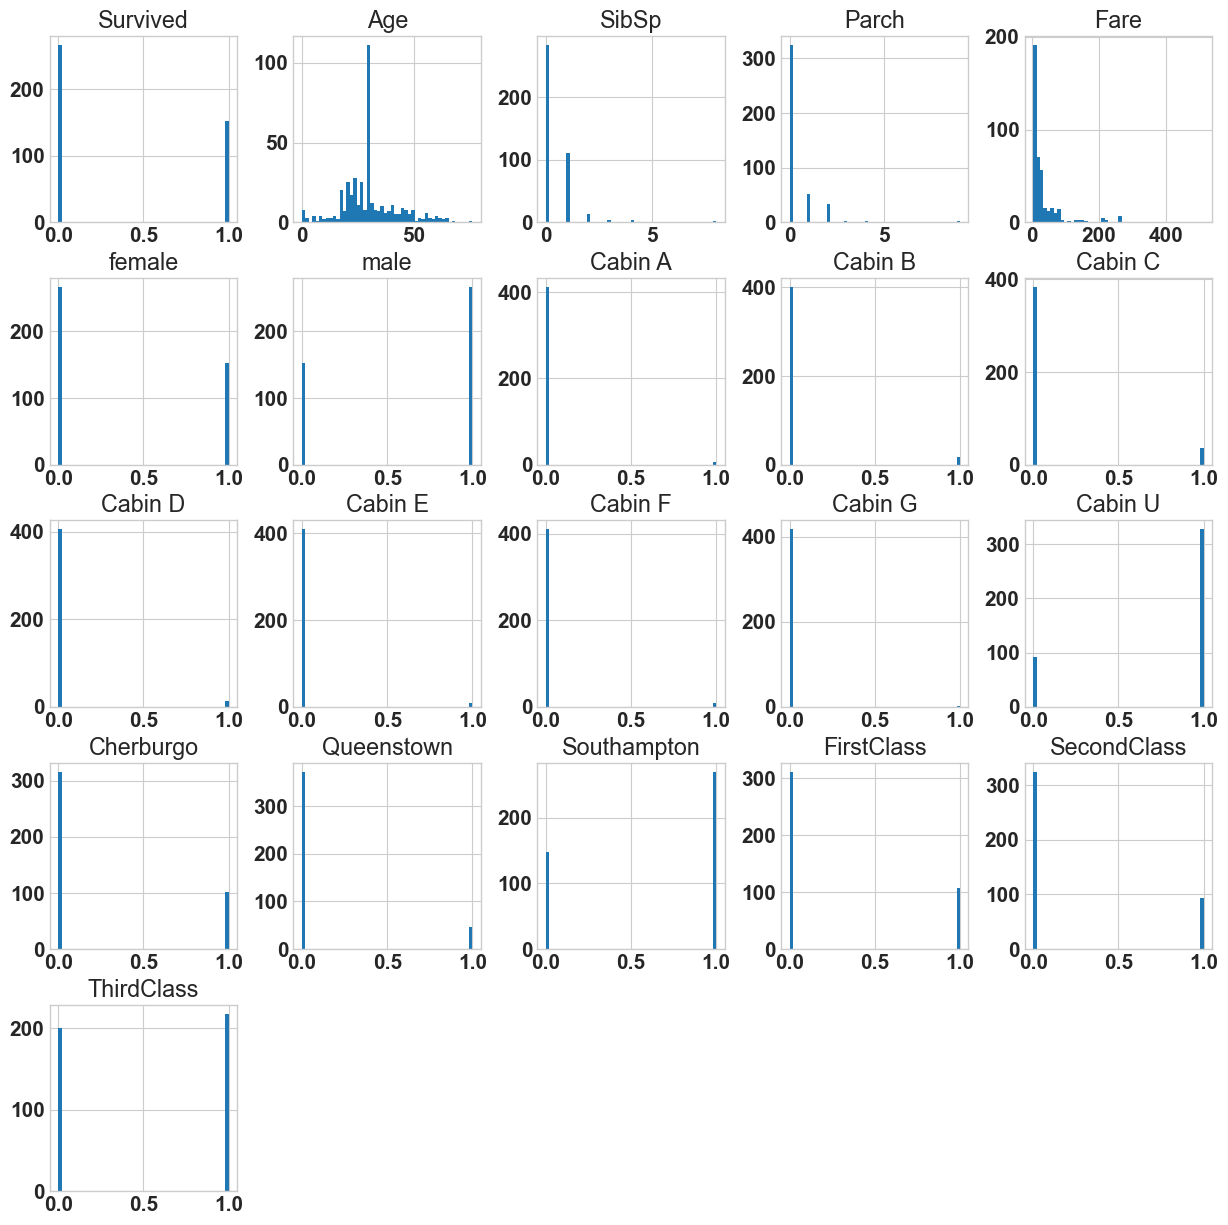

In [60]:
titanic_norm.hist(bins=50, figsize =(15,15))
plt.show()

Los histogramas tienen un buen comportamiento con valores contínuos y discretos, pero no tanto con las categóricas binarias/booleanas, que apenas nos arrojan datos, a parte de su distribución por categorías

Pasaremos a revisar unos gráficos que nos arrojen algo de luz sobre los datos, para poder sacar alguna conclusión valiosa para este estudio.

### Supervivientes:

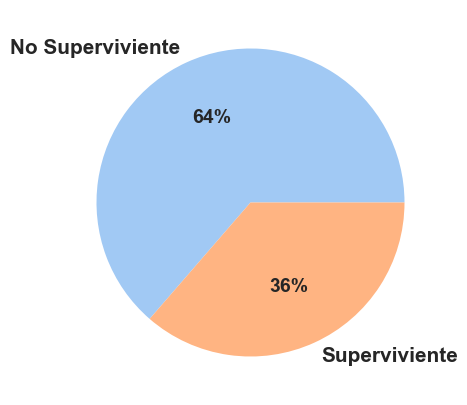

In [61]:
data = list(titanic['Survived'].value_counts())
labels = ['No Superviviente', 'Superviviente']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

plt.show()

- Podemos observar que el porcentaje de supervivientes fue del 36%, frente al 64% que no lo consiguió

### Supervivientes por sexo y edad

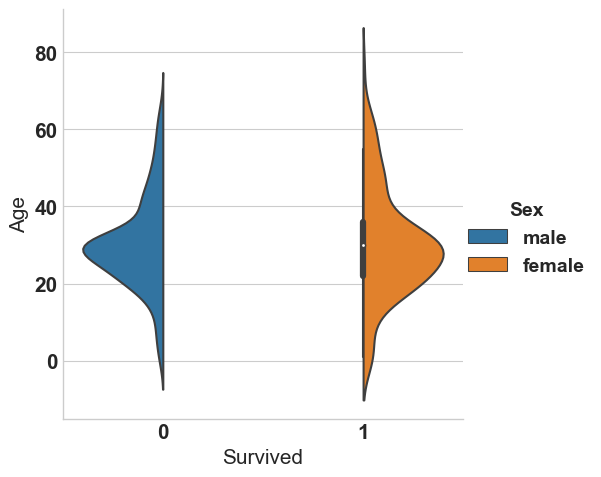

In [62]:
sns.catplot(
    data=titanic, x="Survived", y="Age", hue="Sex",
    kind="violin", split=True,
)

- Com podemos ver, ningun hombre sobrevivió, únicamente mujeres

### Supervivientes por Cubierta

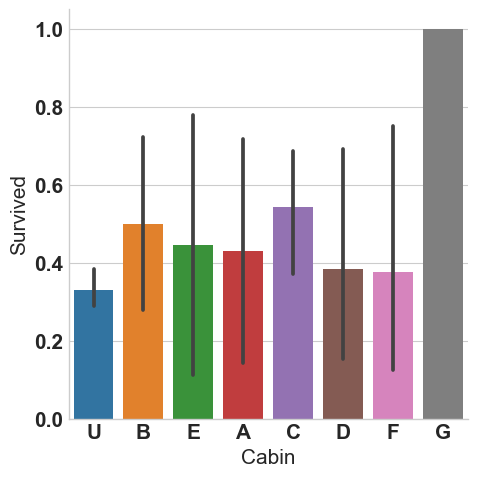

In [63]:

sns.catplot(data=titanic, x="Cabin", y="Survived", kind="bar")

- Podemos observar que la supervivencia ronda el 50% en todas las cubiertas, menos en la G, que es del 100%


### Supervivientes por Clase

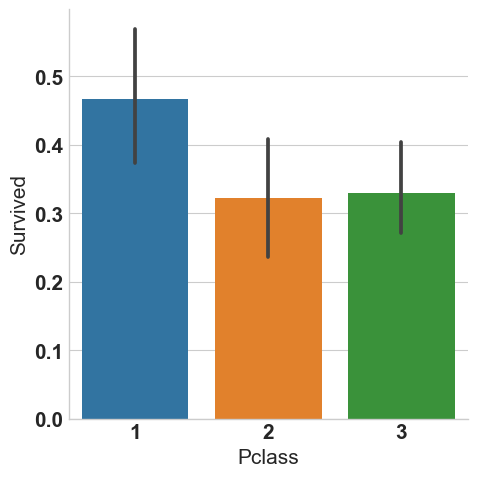

In [64]:
sns.catplot(data=titanic, x="Pclass", y="Survived",  kind="bar")

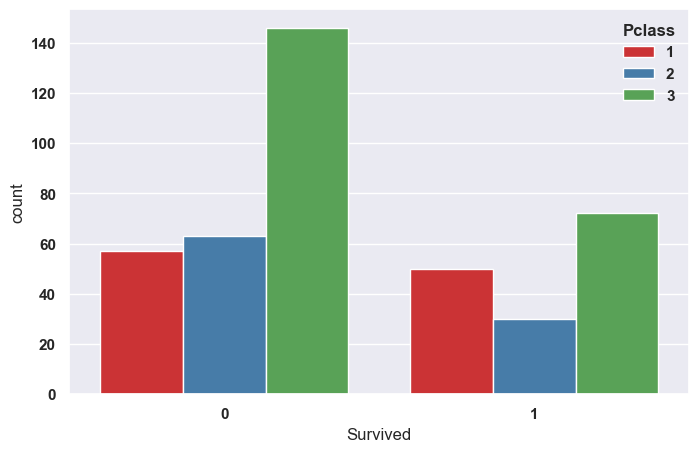

In [65]:
sns.set(style="darkgrid")
sns.countplot( x='Survived', data=titanic, hue="Pclass", palette="Set1");

- Observamos que la superviviencia media de primera clase casi llega al 50%, mientras que en segunda y tercera, baja hasta un poco por encima de 30%
- También que el mayor número de supervivientes se encuntran en tercera clase, pero también es el mayor número de entre los que perecieron

### Supervivientes entre los embarcados en diferentes puertos

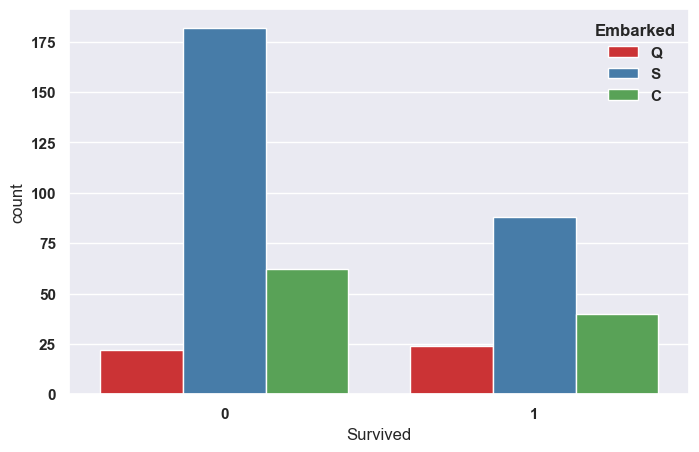

In [66]:
sns.set(style="darkgrid")
sns.countplot( x='Survived', data=titanic, hue="Embarked", palette="Set1");

- Observamos que el mayor número de supervivientes se encuentra entre los que embarcaron en Southampton, aunque también es el número más numerosos entre los que perecieron

### Pasajeros por cubierta

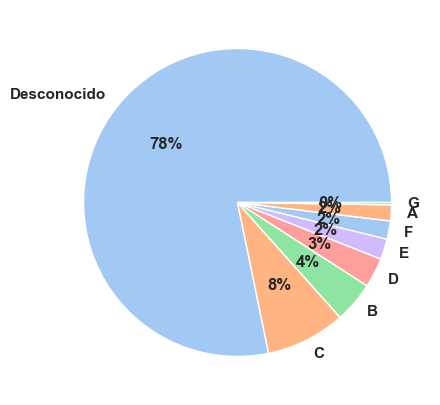

In [67]:
data = list(titanic['Cabin'].value_counts())
labels = ['Desconocido', 'C','B','D','E','F','A','G']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

plt.show()

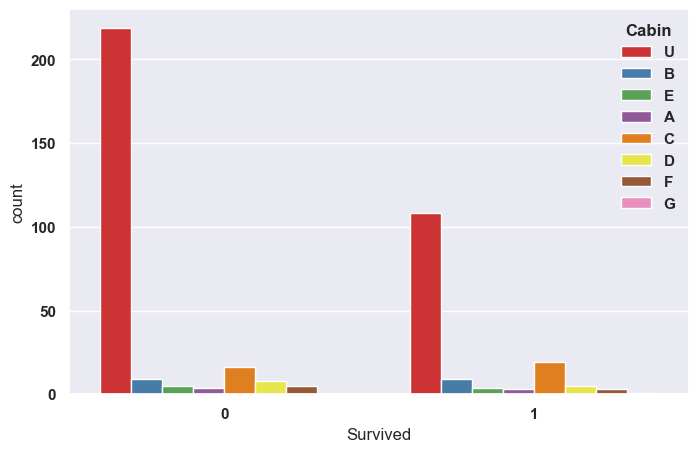

In [68]:
sns.set(style="darkgrid")
sns.countplot( x='Survived', data=titanic, hue="Cabin", palette="Set1");

- Observamos que en la mayoría de los pasajeros registrados en el dataset se desconoce la Cubierta a la que pertenecen

### Pasajeros por Clase

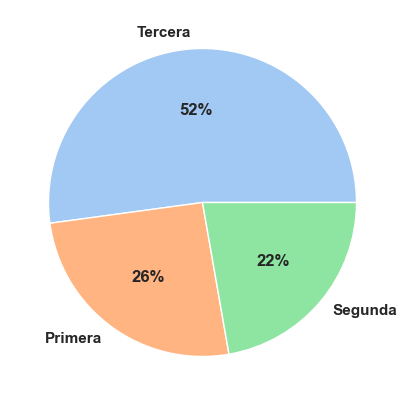

In [69]:
data = list(titanic['Pclass'].value_counts())
labels = ['Tercera', 'Primera','Segunda']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

plt.show()

- Podemos ver que la mayoría del registro de pasajeros era de Tercera clase, con un 52%

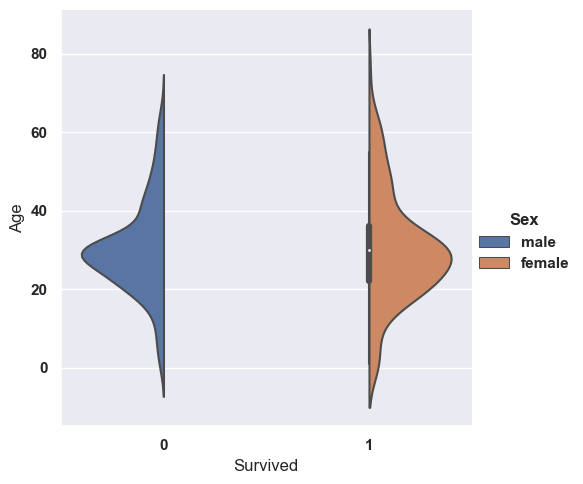

In [70]:
sns.catplot(
    data=titanic, x="Survived", y="Age", hue="Sex",
    kind="violin", split=True,
)

---
---
---

# Buscando correlaciones

Aquí nos damos cuenta de la necesidad de la normalización del modelo para que las correlaciones puedan ser medidas

In [71]:
corr_matrix = titanic_norm.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
female         1.000000
Fare           0.189258
Parch          0.159120
FirstClass     0.126389
Queenstown     0.115574
Cabin C        0.112625
SibSp          0.099943
Cabin G        0.064781
Cabin B        0.060134
Cherburgo      0.033684
Cabin E        0.024919
Cabin A        0.017617
Cabin D        0.007813
Cabin F        0.003300
Age            0.000662
SecondClass   -0.045655
ThirdClass    -0.072405
Southampton   -0.105883
Cabin U       -0.131464
male          -1.000000
Name: Survived, dtype: float64

In [72]:
corr_matrix

,Survived,Age,SibSp,Parch,Fare,female,male,Cabin A,Cabin B,Cabin C,...,Cabin E,Cabin F,Cabin G,Cabin U,Cherburgo,Queenstown,Southampton,FirstClass,SecondClass,ThirdClass
Survived,1.000000,0.000662,0.099943,0.159120,0.189258,1.000000,-1.000000,0.017617,0.060134,0.112625,...,0.024919,0.003300,0.064781,-0.131464,0.033684,0.115574,-0.105883,0.126389,-0.045655,-0.072405
Age,0.000662,1.000000,-0.078870,-0.044980,0.331003,0.000662,-0.000662,0.132197,0.169123,0.275761,...,0.082349,-0.065350,-0.113372,-0.360502,0.161724,-0.015119,-0.135353,0.454726,-0.058211,-0.348797
SibSp,0.099943,-0.078870,1.000000,0.306895,0.170128,0.099943,-0.099943,-0.023554,0.051938,0.099729,...,-0.000484,-0.030780,0.030214,-0.073067,-0.016365,-0.098824,0.079367,0.019166,-0.042418,0.018573
Parch,0.159120,-0.044980,0.306895,1.000000,0.229003,0.159120,-0.159120,-0.014196,0.107455,-0.024072,...,0.041513,0.015341,0.030356,-0.037237,-0.005791,-0.132948,0.092201,-0.005485,-0.026335,0.026719
Fare,0.189258,0.331003,0.170128,0.229003,1.000000,0.189258,-0.189258,0.020890,0.425431,0.462438,...,0.130783,-0.046935,-0.016785,-0.563299,0.310609,-0.156767,-0.176375,0.622663,-0.130525,-0.435303
female,1.000000,0.000662,0.099943,0.159120,0.189258,1.000000,-1.000000,0.017617,0.060134,0.112625,...,0.024919,0.003300,0.064781,-0.131464,0.033684,0.115574,-0.105883,0.126389,-0.045655,-0.072405
male,-1.000000,-0.000662,-0.099943,-0.159120,-0.189258,-1.000000,1.000000,-0.017617,-0.060134,-0.112625,...,-0.024919,-0.003300,-0.064781,0.131464,-0.033684,-0.115574,0.105883,-0.126389,0.045655,0.072405
Cabin A,0.017617,0.132197,-0.023554,-0.014196,0.020890,0.017617,-0.017617,1.000000,-0.027684,-0.039451,...,-0.019359,-0.018230,-0.006391,-0.247390,0.099484,-0.045892,-0.059316,0.222493,-0.069812,-0.136252
Cabin B,0.060134,0.169123,0.051938,0.107455,0.425431,0.060134,-0.060134,-0.027684,1.000000,-0.064127,...,-0.031468,-0.029632,-0.010388,-0.402123,0.153868,-0.074596,-0.089376,0.361655,-0.113477,-0.221472
Cabin C,0.112625,0.275761,0.099729,-0.024072,0.462438,0.112625,-0.112625,-0.039451,-0.064127,1.000000,...,-0.044843,-0.042227,-0.014804,-0.573044,0.230440,-0.078703,-0.155459,0.515375,-0.161709,-0.315608


<AxesSubplot:>

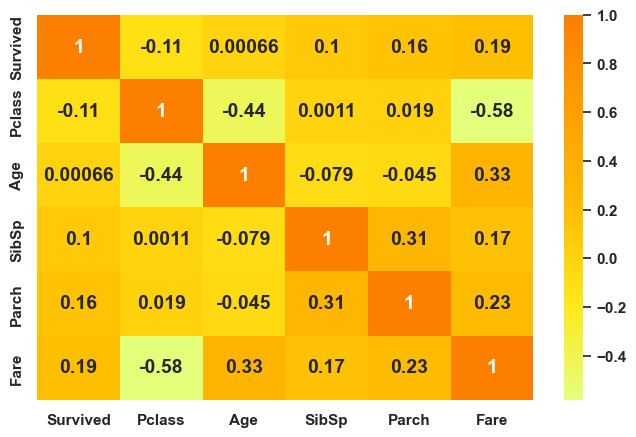

In [73]:
plt.rcParams['font.size'] =14
corr = titanic.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

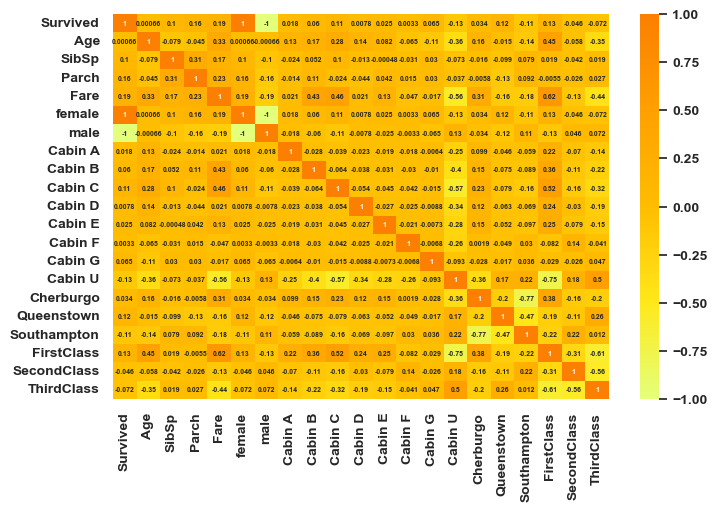

In [74]:
corr_norm = titanic_norm.corr()

# Reduciremos el tamaño de fuente para este gráfico (y lo volveremos a dejar como estaba) por el tamaño de celdas
# tamaño del texto en las etiquetas por defecto
mpl.rc('axes',  labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
plt.rcParams['font.size'] =5

sns.heatmap(corr_norm, cmap = 'Wistia', annot= True)

# Volvemos a dejar el tamaño de letras por defecto
mpl.rc('axes',  labelsize=15)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
plt.rcParams['font.size'] =14

## Conclusiones preliminares:
- Podemos observar una corelación directa-100% entre Supervivientes y el Sexo.
- Según los datos que tenemos: Todas las mujeres sobrevivieron, mientras todos los hombre perecieron

- Para las otra categorías de variables, aparecen débiles correlaciones positivas, entre las que podemos detacar:
  - 0.10 Pasajeros con un mayor número de herman@s a bordo 
  - 0.11 Pasajeros de los camarotes de la cubierta "C"
  - 0.13 Pasajeros de Primera Clase
  - 0.16 Pasajeros con un mayor número de padres e hijos a bordo
  - 0.19 Mayor precio pagado por el billete

---
---
---

# Entrenando modelos de Clasificación
---

Revisamos el Datasets antes de usarlos en los entrenamientos del modelo

Usaremos el modelo normalizado "titanic_norm"

In [75]:
titanic_norm.info()
titanic_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         418 non-null    float64
 5   female       418 non-null    float64
 6   male         418 non-null    float64
 7   Cabin A      418 non-null    float64
 8   Cabin B      418 non-null    float64
 9   Cabin C      418 non-null    float64
 10  Cabin D      418 non-null    float64
 11  Cabin E      418 non-null    float64
 12  Cabin F      418 non-null    float64
 13  Cabin G      418 non-null    float64
 14  Cabin U      418 non-null    float64
 15  Cherburgo    418 non-null    float64
 16  Queenstown   418 non-null    float64
 17  Southampton  418 non-null    float64
 18  FirstClass   418 non-null    float64
 19  SecondCl

,Survived,Age,SibSp,Parch,Fare,female,male,Cabin A,Cabin B,Cabin C,...,Cabin E,Cabin F,Cabin G,Cabin U,Cherburgo,Queenstown,Southampton,FirstClass,SecondClass,ThirdClass
0,0,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


### 
---

## Creación del Train y Test Set
---

Primeramente generaremos una semilla de aletoriedad, que normalmente se usa el valor 42, que usaremos para barajar los índices del Dataset a la hora de realizar la división del Dataset de Entrenamiento del de Test

In [84]:
# plantamos una semilla
np.random.seed(42)

Necesitamos crear, del total de datos del Dataset, una subdivisión. Una parte será para entrenar al modelo (TrainSet) y otro para comprobar el resultado del entrenamiento (TestSet)

Creamos una función para este trabajo llamada "split_train_test", para separ dichos Set

Aquí podemos ver la función np.random.permutation, a la que hemos previamente configurado con la semilla "42", para que baraje de forma "aleatoria" los índices, tanto del dataset de entrenamiento, como el de Test

In [85]:
# Definimos la función 
def split_train_test(data, test_ratio):
    # Definimos el tamaño de la parte de Test
    test_set_size  =int(len(titanic_norm)*test_ratio)
    # Barajamos los indices
    shuffle_indices=np.random.permutation(len(data))
    # Aplicamos los indices barajados a la parte de test
    test_indices   =shuffle_indices[:test_set_size]
    # Aplicamos los indices barajados a la parte de entrenamiento
    train_indices  =shuffle_indices[test_set_size:]
    # Devolvemos los datos a los dos datasets, Train y Test
    return data.iloc[train_indices], data.iloc[test_indices]

Aplicaremos normalmente una división 80/20. Otros ratios pueden ser 70:30, 60:40, e incluso 50:50, pero en este caso usaremos el primero, ya que es el más común.

In [86]:
# Agreagamos el ratio de split
ratio = 0.2
# Ejecutamos la función
X_train, X_test = split_train_test(titanic_norm, ratio)
# Revisamos el número de filas en cada Set
print('Número de filas Total del dataset : ',len(titanic_norm))
print('Ratio : ', 100-100*ratio, '/',ratio*100) 
print('Número de filas por dataset :')
print('TrainSet : ',len(X_train))
print('TestSet  : ', len(X_test))


Número de filas Total del dataset :  418
Ratio :  80.0 / 20.0
Número de filas por dataset :
TrainSet :  335
TestSet  :  83


Una vez que tenemos el Dataset de entrenamiento (X_train), creamos una copia con la columna de resultados, que llamaremos "y_train" y eliminaremos dicha columna del Dataset de entrenameiento (X_train)

In [87]:
# Creamos un nuevo Dataset con la columna Survived a predecir con el modelo
y_train = X_train["Survived"].copy()
# Eliminamos dicha columna para el modelo de entrenamiento
X_train = X_train.drop("Survived", axis=1)

También haremos lo mismo con el dataset de Test

In [88]:
# Creamos un nuevo Dataset con la columna Survived a testear y predecir con el modelo
y_test = X_test["Survived"].copy()
# Eliminamos dicha columna para el modelo de entrenamiento
X_test = X_test.drop("Survived", axis=1)

Función que muestra las puntuaciones, con su media y su desviación

In [110]:
def display_scores(scores):
    print('Predicción:')
    print('===========')
    print(f"\nMin:   {scores.min()}")
    print(f"Media:   {scores.mean()}")
    print(f"Max:   {scores.max()}")
    print(f"\nDesviación estandar:    {scores.std()}")

---
---
---

## Entrenando y evaluando :
---

## Casificador SGD 'Descenso del gradiente' o 'Stochastic Gradient Descent'
---

- Este modelo iterativo, realizará una comprobación constante de la funcion coste o pérdida hacie el máximo descenso hacia el equilibrio en las puntuaciones

In [103]:
from sklearn.linear_model import SGDClassifier

In [104]:
# Creamos un Clasificador SGD con random 42
sgd_clf = SGDClassifier(random_state=42)

Entrenamiento del modelo

In [105]:
# Entrenamos el modelo
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

Predicciones del modelo

In [106]:

# Realizamos las predicciones del modelo con Test
sgd_predictions = sgd_clf.predict(X_test)
# Visualizamos las predicciones
sgd_predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

## K-fold Cross-Validation

- Con el método K-fold Cross-Validation, realizaremos una validación cruzada con un número de "plegados" k.
- Eso quiere decir que dividirá el dataset en "k" partes, y realizará un testeo del modelo (en este caso el descenso del gradiente) "k" veces, sin incluir cada una de las veces de una parte.
- Eso nosdará un resultado que podemos promediar y ver si independientemente de los datos en cada una de las partes, funcionará de la misma forma.
- El número de adecuado de "plegados" dependerá de la complejidad del modelo, y del tamaño y la variabilidad del dataset.
- Se recomienda que el valor de k en k-fold se alo suficientemente grande para que reduzca la variabilidad del dataset, pero que no sea muy costoso, computacionalmente hablando.
- En un conjunto de datos pequeño, se puede usar k=5 o K=10, mientras que en conjuntos grandes, se puede utilizar k=3 o k=5.
- Se recomienda no usar valores muy bajos de k, como 2, porque pueden ocasionar estimaciones inestables y sesgadas.
- Normalmente se habla de la regla del 10%, es decir, que la división de k debería dar el 10% de los registros
- En este caso al ser un dataset muy pobre en cantidad de registros (418) en total.
- En la división entre el entrenamiento y el test es de 335 / 83
- podríamos usar 335/10 = 33.5 divisiones, pero como debe sert un número entero podemos decir que k=30 sería óptimo

In [107]:
# Importamos la librería
from sklearn.model_selection import cross_val_score

In [108]:
# Llamamos al método de la validación cruzada "cross_val_score"
sgd_score = cross_val_score(sgd_clf, X_train, y_train, cv=30, scoring="accuracy")
sgd_score


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.90909091, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [111]:
# Mostramos las puntuaciones
display_scores(sgd_score)

Predicción:

Min:   0.9090909090909091
Media:   0.996969696969697
Max:   1.0

Desviación estandar:    0.01631868123374093


#### Conclusiones:
- Podemos observar que el modelo básicamente tiene un 100% de aciertos, lo que indica un sobre-entrenamiento.

## Dummy Classifier
---

Como no nos podemos fiar de los resultados anteriores, realizaremos una prueba con un ·Dummy Clasifier" el cual predecirá que NADIE sobrevive. 

In [112]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)

print(any(dummy_clf.predict(X_train)))

False


Este Falso nos quiere decir que no se ha detectado ningús superviviente (como es de esperar en el caso de los Dummy Clasifiers)

In [114]:
dummy_score = cross_val_score(dummy_clf, X_train, y_train, cv=30, scoring="accuracy")
dummy_score

array([0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.63636364, 0.63636364, 0.63636364, 0.63636364, 0.63636364,
       0.63636364, 0.63636364, 0.63636364, 0.63636364, 0.63636364,
       0.63636364, 0.63636364, 0.63636364, 0.63636364, 0.63636364,
       0.63636364, 0.63636364, 0.63636364, 0.63636364, 0.63636364,
       0.63636364, 0.63636364, 0.63636364, 0.63636364, 0.72727273])

In [115]:
display_scores(dummy_score)

Predicción:

Min:   0.6363636363636364
Media:   0.6444444444444445
Max:   0.7272727272727273

Desviación estandar:    0.01905854774152849


Estos resultados de aproximadamente el 64% es porque, el 64% de las personas No sobrevivieron, por lo tanto si (como en este caso con el Dummy Classifier) decimos que NINGUNA persona ha sobrevivido, acertaremos en el 64% de las ocasiones.

## Matrices de Confusión
---

Una mejor forma de acercarnos a unas métricas de rendimiento de los modelos, son las matrices de confusión, las cuales nos aportarán las métricas de la Precisión y la Sensibilidad (Precision/Recall)

In [124]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=30)

In [125]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm


array([[215,   1],
       [  0, 119]], dtype=int64)

### Esto significa que :
  - (TN) True Negative = 215                     ///    (FP) False Positive =  1  (Err.Tipo I)
  - (FN) False Negative =  0  (Err. Tipo II)     ///    (TP) True Positive = 119

Volvemos a observar un sobre-entrenamiento del modelo

### Precisión / Precision:
$$ precision = \frac{TP}{TP + FP} $$

Precisión del modelo

In [126]:
precision = cm[1][1]/(cm[1][1]+cm[0][1])
precision

0.9916666666666667

### Sensibilidad / Recall:
$$ sensibilidad = \frac{TN}{TN + FN} $$

Sensibilidad del modelo

In [127]:
recall = cm[0][0]/(cm[0][0]+cm[1][0])
recall

1.0

### Funciones "Precision" & "Recall" para realizar el mismo trabajo desde una librería

In [128]:
from sklearn.metrics import precision_score, recall_score

Precisión del modelo

In [129]:
precision_score(y_train, y_train_pred)

0.9916666666666667

Sensibilidad del modelo

In [130]:
recall_score(y_train, y_train_pred)

1.0

#### Conclusión :
- Observamos Precisión de más del 99% y Sensibilidad del 100%
- Comprobamos sobradamente el sobre-entrenamiento en las puntuaciones

## F1 Score
---

In [131]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)


0.99581589958159

- La metrica F1 Score beneficia a los clasificadores que tienen un valor parecedo para "Precision" y "Recall"
- En este caso es casi perfecto debido al sobre-entrenamiento

## Precision VS Recall ( Precisión VS Sensibilidad )
---
Hay que tener en cuenta que ámbas métricas se relacionan de tal modo que no se pueden tener al mismo tiempo, y que , si aumentas la sensibilidad reducirás la precisión y viceversa

Como la librería Scikit-learn no nos deja ver los límites(theshold) directamente, podemos saberlo a través del método "decision_function()" en vez de "predict()"

#### Con el siguiente ejemplo , podemos ver que ocurre cuando el límite lo ponemos a 0 o a 3000

In [132]:
y_scores = sgd_clf.decision_function(X_test)
y_scores

array([ -858.11101459,   618.89355552,  -798.23615637,  -950.51566406,
         510.05054766,  -933.51362182,   464.93058905,  -902.75157475,
         448.91413313,  -964.70616385, -1073.59345185,   613.1507861 ,
         458.04059122,   682.74411819,  -964.70616385,  -933.95384859,
         461.97769589,  -806.86692776,  -991.67189134, -1020.50994233,
        -875.06793635,  -897.98947305,   358.85696372,  -952.22520195,
         560.22018017,   626.89717821,   528.48872439,  -956.69830057,
        -851.72326711,  -952.22520195,  -949.80240311,   465.08898137,
         563.79572259,  -964.70616385,   511.93309092,  -968.10052881,
         642.91064975,  -827.65425389,   439.04894822,  -703.27635996,
         642.91064975,   453.36227844,  -854.12044739,  -948.41445111,
        -836.96929779,  -990.54954186,   561.07155375,   491.22457595,
         516.89362883,  -948.06792701,  -759.60724918,   575.58075341,
         467.86761277,  -905.23164573,  -889.166364  ,   413.32985969,
      

In [133]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [134]:
y_some_digit_pred

array([False,  True, False, False,  True, False,  True, False,  True,
       False, False,  True,  True,  True, False, False,  True, False,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False, False, False,  True,  True, False,  True, False,
        True, False,  True, False,  True,  True, False, False, False,
       False,  True,  True,  True, False, False,  True,  True, False,
       False,  True, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False,  True, False,  True,  True, False, False,
        True, False])

Vemos disparidad de resultados con un límite/threshold = 0

In [135]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)


In [136]:
y_some_digit_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

En cambio podemos observar como todos son Flalsos cuando el límite es 3000

#### Para poder visualizar el límite/threshold usaremos la validación cruzada con el método "decision_function"

In [137]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=30,method="decision_function")

In [138]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [139]:
# Pongamos un límite de :
threshold = 0

### Gráfica Presicion/Recall VS Threshold

##### En esta gráfica podemos observar que cuando el threshold alcanza sus máximos respecto a Precisión y Sensibilidad

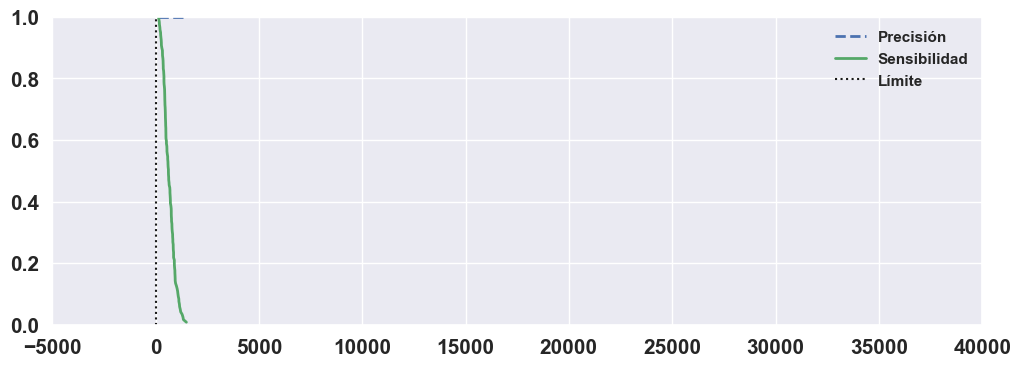

In [140]:
plt.figure(figsize=(12, 4))
plt.axis([-5000, 40000, 0, 1])
plt.plot(thresholds, precisions[:-1], "b--", label="Precisión", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Sensibilidad", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="Límite")
plt.legend()
plt.show()

Observamos el sobre-entrenamiento de nuevo

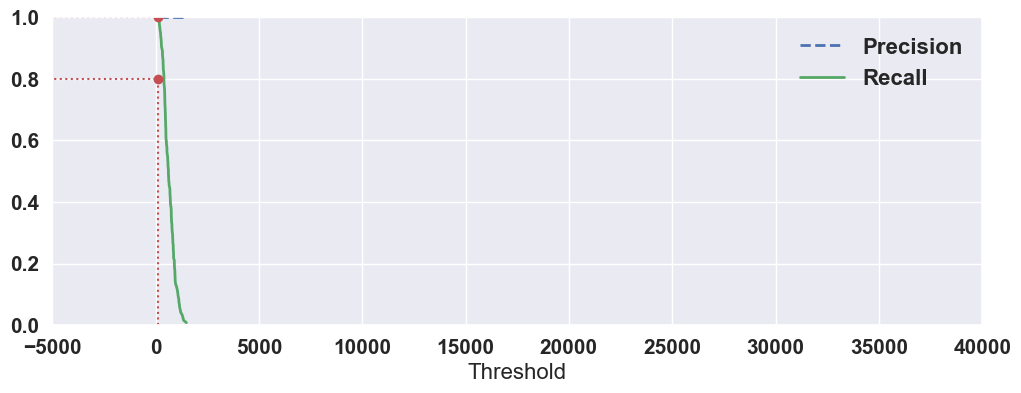

In [141]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2);
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2);
    plt.legend(loc="upper right", fontsize=16);
    plt.xlabel("Threshold", fontsize=16);
    plt.grid(True);
    plt.axis([-5000, 40000, 0, 1]);

recall_90_precision = recalls[np.argmax(precisions >= 0.80)];
threshold_90_precision = thresholds[np.argmax(precisions >= 0.80)];

plt.figure(figsize=(12, 4));
plot_precision_recall_vs_threshold(precisions, recalls, thresholds);
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.8], "r:");
plt.plot([-50000, threshold_90_precision], [0.8, 0.8], "r:");
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:");
plt.plot([threshold_90_precision], [0.8], "ro");
plt.plot([threshold_90_precision], [recall_90_precision], "ro");
plt.show();

Observamos el sobre-entrenamiento de nuevo

### Precision VS Recall

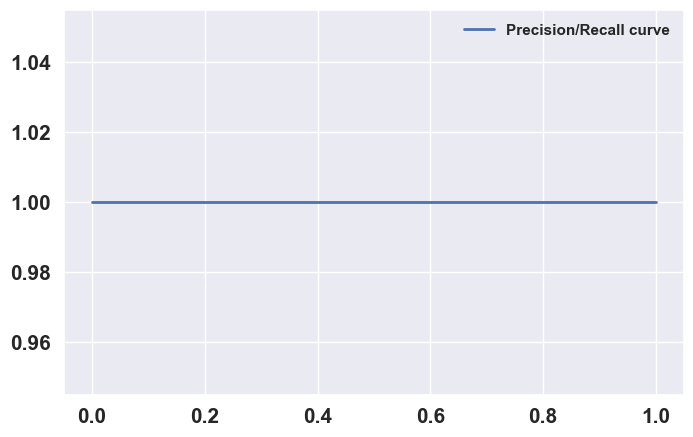

In [142]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.legend()
plt.show()


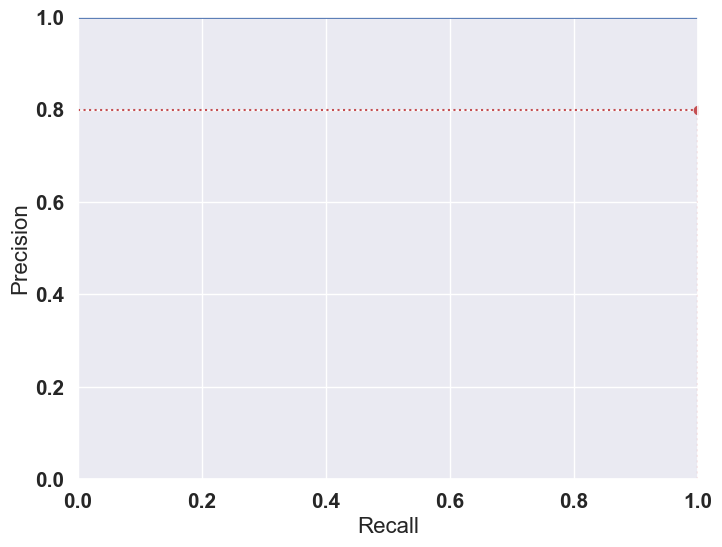

In [143]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2);
    plt.xlabel("Recall", fontsize=16);
    plt.ylabel("Precision", fontsize=16);
    plt.axis([0, 1, 0, 1]);
    plt.grid(True);

plt.figure(figsize=(8, 6));
plot_precision_vs_recall(precisions, recalls);
plt.plot([recall_90_precision, recall_90_precision], [0., 0.8], "r:");
plt.plot([0.0, recall_90_precision], [0.8, 0.8], "r:");
plt.plot([recall_90_precision], [0.8], "ro");
plt.show();

---
---
---

## The ROC Curve

In [144]:
from sklearn.metrics import roc_curve;

fpr, tpr, thresholds = roc_curve(y_train, y_scores);

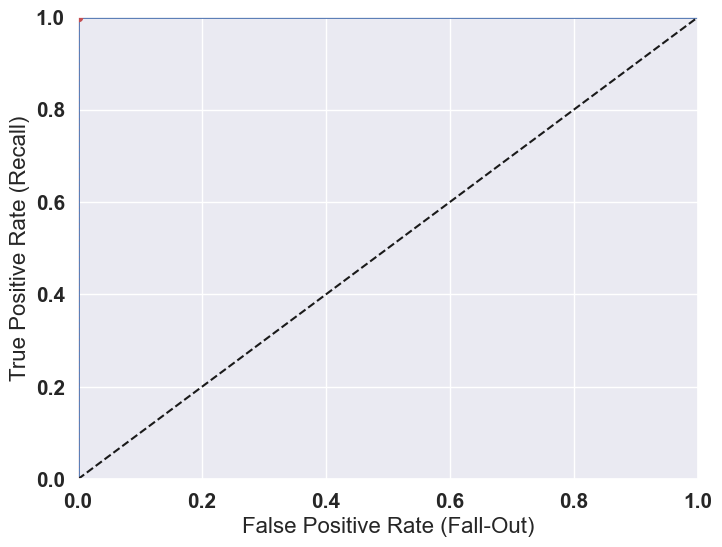

In [145]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label);
    plt.plot([0, 1], [0, 1], 'k--');
    plt.axis([0, 1, 0, 1]);
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16);
    plt.ylabel('True Positive Rate (Recall)', fontsize=16);
    plt.grid(True);

plt.figure(figsize=(8, 6));
plot_roc_curve(fpr, tpr);
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)];
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:");
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:");
plt.plot([fpr_90], [recall_90_precision], "ro");
plt.show();

In [146]:
from sklearn.metrics import roc_auc_score;

roc_auc_score(y_train, y_scores)

1.0

In [147]:
from sklearn.ensemble import RandomForestClassifier;

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

y_probas_forest = cross_val_predict(forest_clf,X_train, y_train, cv=3,method="predict_proba");

In [148]:
y_scores_forest=y_probas_forest[:,1];

fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train, y_scores_forest);

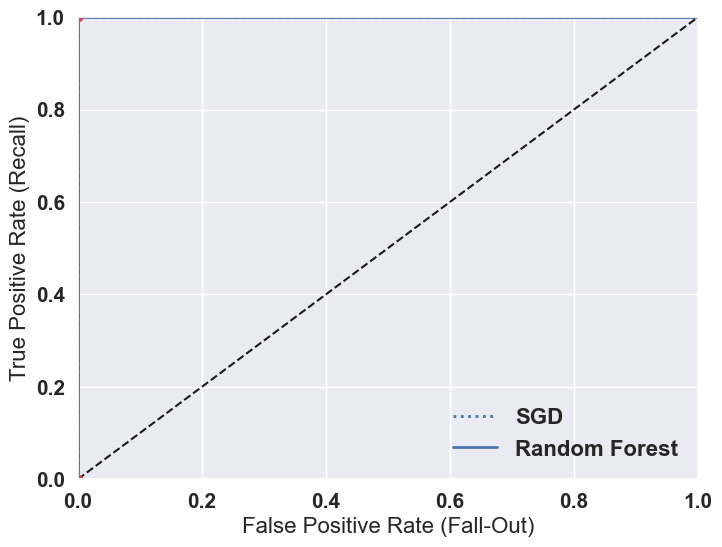

In [149]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)];

plt.figure(figsize=(8, 6));
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD");
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest");
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:");
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:");
plt.plot([fpr_90], [recall_90_precision], "ro");
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:");
plt.plot([fpr_90], [recall_for_forest], "ro");
plt.grid(True);
plt.legend(loc="lower right", fontsize=16);
plt.show();

In [150]:
roc_auc_score(y_train,y_scores_forest)

1.0

In [151]:
y_train_pred_forest = cross_val_predict(forest_clf,X_train,y_train,cv=3);
precision_score(y_train,y_train_pred_forest)

1.0

In [152]:
recall_score(y_train, y_train_pred_forest)

1.0

---
---
---

## Conclusiones finales
---

- Existe un sobre entrenamiento de los modelos.
- Las razones pueden ser :
    - Falta de catidad de datos, porque únicamente tenemos 418 registros
    - O la más probable, que al tener una variable (sexo) con una correlación del 100%, ya que únicamente los hombres mueren y las mujeres sobreviven, el modelo de predicción sobre-entrena de forma natural

---
---
---

# EXTRA:
---
---
#### Predicciones con un modelo sin el sexo como variable:
---

Preparamos lo datos

In [153]:
# Realizamos una copia del dataset
titanic_nosex = titanic_norm.copy()
# Borramos la variable sexo
titanic_nosex = titanic_nosex.drop(['male','female'], axis=1)
# Realizamos una división para el set de entrenamiento y test
# Agreagamos el ratio de split
ratio = 0.2
# Ejecutamos la función
X_train_nosex, X_test_nosex = split_train_test(titanic_nosex, ratio)
# Revisamos el número de filas en cada Set
print('Número de filas Total del dataset : ',len(titanic_norm))
print('Ratio : ', 100-100*ratio, '/',ratio*100) 
print('Número de filas por dataset :')
print('TrainSet : ',len(X_train_nosex))
print('TestSet  : ', len(X_test_nosex))
# Creamos un nuevo Dataset con la columna Survived a predecir con el modelo
y_train_nosex = X_train_nosex["Survived"].copy()
# Eliminamos dicha columna para el modelo de entrenamiento
X_train_nosex = X_train_nosex.drop("Survived", axis=1)
# Creamos un nuevo Dataset con la columna Survived a testear y predecir con el modelo
y_test_nosex = X_test_nosex["Survived"].copy()
# Eliminamos dicha columna para el modelo de entrenamiento
X_test_nosex = X_test_nosex.drop("Survived", axis=1)

Número de filas Total del dataset :  418
Ratio :  80.0 / 20.0
Número de filas por dataset :
TrainSet :  335
TestSet  :  83


Uso del Casificador SGD 'Descenso del gradiente' o 'Stochastic Gradient Descent'

In [154]:
# Creamos un Clasificador SGD con random 42
sgd_clf_nosex = SGDClassifier(random_state=42)
# Entrenamos el modelo
sgd_clf_nosex.fit(X_train_nosex, y_train_nosex)
# Realizamos las predicciones del modelo con Test
sgd_predictions_nosex = sgd_clf_nosex.predict(X_test_nosex)
# Llamamos al método de la validación cruzada "cross_val_score"
sgd_score_nosex = cross_val_score(sgd_clf_nosex, X_train_nosex, y_train_nosex, cv=30, scoring="accuracy")
sgd_score_nosex

array([0.33333333, 0.66666667, 0.58333333, 0.33333333, 0.66666667,
       0.72727273, 0.54545455, 0.45454545, 0.63636364, 0.72727273,
       0.36363636, 0.63636364, 0.63636364, 0.36363636, 0.72727273,
       0.72727273, 0.36363636, 0.63636364, 0.81818182, 0.63636364,
       0.36363636, 0.36363636, 0.63636364, 0.45454545, 0.63636364,
       0.63636364, 0.63636364, 0.36363636, 0.36363636, 0.63636364])

In [155]:
# Mostramos las puntuaciones
display_scores(sgd_score_nosex)

Predicción:

Min:   0.3333333333333333
Media:   0.5558080808080809
Max:   0.8181818181818182

Desviación estandar:    0.14773676909820788


Probamos el Dummy Classifier

In [158]:
# Probamos con el Dummy Classifier
dummy_clf_nosex = DummyClassifier()
dummy_clf_nosex.fit(X_train_nosex, y_train_nosex)

DummyClassifier()

In [159]:
dummy_score_nosex = cross_val_score(dummy_clf_nosex, X_train_nosex, y_train_nosex, cv=30, scoring="accuracy")
dummy_score_nosex

array([0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.72727273, 0.63636364, 0.63636364, 0.63636364, 0.63636364,
       0.63636364, 0.63636364, 0.63636364, 0.63636364, 0.63636364,
       0.63636364, 0.63636364, 0.63636364, 0.63636364, 0.63636364,
       0.63636364, 0.63636364, 0.63636364, 0.63636364, 0.63636364,
       0.63636364, 0.63636364, 0.63636364, 0.63636364, 0.63636364])

In [160]:
display_scores(dummy_score_nosex)

Predicción:

Min:   0.6363636363636364
Media:   0.6444444444444445
Max:   0.7272727272727273

Desviación estandar:    0.019058547741528493


---

### Conclusiones:
- Observamos el modelo de descenso del gradiente con una mediaaprox. del 55%
- Observamos que el Dummy Classifier es aprox. del 64%
- Concluimos que el modelo es deficiente, tanto en cuanto cuando pronosticamos que NADIE sobrevive, acertaremos en el 64% de las ocasiones frente al 54% del modelo entrenado con el descenso del gradiente.

- Concluimos que el dataset no nos proporciona (sin la variable sexo) la cantidad de datos suficientes para entrenar un modelo eficiente

---
---
---